# Seattle Airbnb Data Analysis using CRISP-DM

### 6 steps of CRISP-DM (Cross-Industry Standard Process for Data Mining):

<b>1.Business Understanding<br>
2.Data Understanding<br>
3.Data Preparation<br>
4.Modelling<br>
5.Evaluation<br>
6.Deployment<br></b>

### 1. Business Understanding
Airbnb has been allowing visitors and hosts to expand their travel options and provide a more distinctive, personalised way of experiencing the world since 2008. Airbnb has evolved into a one-of-a-kind service that is used and recognised all over the world. The company's data analysis of millions of listings offered by Airbnb is a critical aspect. These millions of listings generate a lot of data, which can be analysed and used for a variety of purposes, including security, business decisions, understanding customer and provider (host) behaviour and performance on the platform, guiding marketing initiatives, and implementing innovative additional services, among others.

In this project, we are going to use calendar.csv, listings.csv and reviews.csv to answer a few business questions:<br>

1. Which cities in Seattle provide the highest listings.<br>
2. What kind of properties are available in Seattle listings with a relatively high price and instant bookings.<br>
3. How does the host deals with cancellation policies from customers.<br>
4. How does the customer feel about their experience with the listings of Seattle.<br>
5. Price Prediction. <br>

### 2. Data Understanding
The Seatlle Airbnb Open Dataset catalogues homestay listings in Seattle, Washington from 01-2016 to 01-2017.

There are 3 subsets in the dataset:

The pricing for each listing id for a certain day is described in calendar.csv.<br>
listings.csv contains a detailed description of each listing id, as well as review scores.<br>
For each individual listing id, reviews.csv gives detailed reviews.<br>


Here's an article on<a href ="https://google.com"> How to ‘break the ice with Datasets’ and then leverage their friendship to Gain Useful Insights for any ‘Data Savvy’</a>using this dataset.<br>
You can find all the detailed codes here by clicking on the respective links.<br>
[Business Understanding](#1.-Business-Understanding)<br>
[Data Understanding](#2.-Data-Understanding)<br>
[Data Preparation](#3.-Data-Preparation)<br>
[1.Missing values check](#Missing-Values-Check)<br>
[2.Treating price column datatype](#Treating-Price-column-datatype)<br>
[3.Further Exploring the Data for Unique values check](#Further-Exploring-the-Data-for-Unique-values-check)<br>
[4.Dropping columns with 0 fill rates](#Dropping-columns-with-0-fill-rates)<br>
[5.Handling Categorical Data](#Handling-Categorical-Data)<br>
[6.Visual Analysis](#Visual-Analysis)<br>
[7.Data Modelling](#4.Data-Modelling)<br>
[8.Evaluation](#5.Evaluation)<br>
[9.Text Data handling](#Sentiment-analysis)<br>
[10.1.Business Insights gathering1](#Q3.-Which-cities-in-Seattle-provide-the-highest-listings.)<br>
[10.2.Business Insights gathering2](#Q1.-What-kind-of-properties-are-available-in-Seattle-listings-with-a-relatively-high-price-and-instant-bookings.)<br>
[10.3.Business Insights gathering3](#Q2.-How-does-the-host-deals-with-cancellation-policies-from-customers.)<br>


### 3. Data Preparation

In [1]:
#Importing necessary libraries
#for statistical analysis
import pandas as pd
import numpy as np
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#for NLP
from textblob import TextBlob
#for Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Reading datasets
#1.calendar
calendar = pd.read_csv(r'calendar.csv')
#2.Listings
listings = pd.read_csv(r'listings.csv')
#3.Reviews
reviews = pd.read_csv(r'reviews.csv')

### Feel of the data

In [3]:
#for calendar
calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
#for listings
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
#for reviews
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Missing Values Check

### For Calendar

In [9]:
#% of missing valus for a column
(calendar.isnull().sum()/calendar.shape[0])*100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

In [10]:
calendar['price'].describe()

count      934542
unique        669
top       $150.00
freq        36646
Name: price, dtype: object

In [11]:
#price column is object, so let's convert it into float
#Firstly, missing values are imputed with '$0' constant
calendar['price'] = calendar['price'].fillna('$0')

In [12]:
#lets make it float
#remove $ sign
cal_float = lambda x:(x.lstrip('$'))
calendar['price'] = calendar['price'].apply(cal_float)
#replaced , from numbers e.g. 1,234 = 1234
cal_rep = lambda x:x.replace(',','')
calendar['price'] = calendar['price'].apply(cal_rep)
#converted the datatype to float
calendar['price'] = calendar['price'].astype('float')



In [13]:
calendar['price'].describe()

count    1.393570e+06
mean     9.250720e+01
std      1.077295e+02
min      0.000000e+00
25%      0.000000e+00
50%      7.500000e+01
75%      1.300000e+02
max      1.650000e+03
Name: price, dtype: float64

### Visual Representation for Calendar

<AxesSubplot:xlabel='price'>

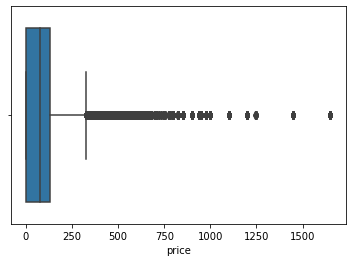

In [14]:
sns.boxplot(data=calendar,x='price')

<AxesSubplot:>

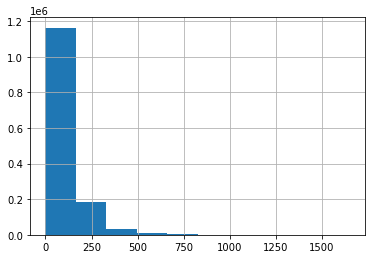

In [15]:
calendar['price'].hist()

### For Listings

In [16]:
#Checking null values
a = ((listings.isnull().sum()/listings.shape[0])*100).sort_values(ascending=False)
total_list = a[0:35]#prints 35 column variables with missing values in ascending order
print(total_list)

license                        100.000000
square_feet                     97.459403
monthly_price                   60.267156
security_deposit                51.126244
weekly_price                    47.380828
notes                           42.063908
neighborhood_overview           27.029859
cleaning_fee                    26.977475
transit                         24.463070
host_about                      22.498690
host_acceptance_rate            20.246202
review_scores_accuracy          17.234154
review_scores_checkin           17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
last_review                     16.422211
first_review                    16.422211
reviews_per_month               16.422211
space                           14.903091
host_response_rate              13.698271
host_response_time              13

### Dropping columns with 0 fill rates

In [17]:
#Dropping columns with 0 fill rates
listings = listings.dropna(how='all',axis=1)

In [18]:
#segregating listings dataframe to get numeric and string columns separately.
objects = listings.select_dtypes(include=['object'])
numeric = listings.select_dtypes(exclude=['object'])

In [19]:
#checking null values for numeric columns
numeric.isnull().sum().sort_values()

id                                   0
number_of_reviews                    0
availability_365                     0
availability_90                      0
availability_60                      0
availability_30                      0
calculated_host_listings_count       0
minimum_nights                       0
guests_included                      0
maximum_nights                       0
scrape_id                            0
host_id                              0
latitude                             0
accommodates                         0
longitude                            0
beds                                 1
host_total_listings_count            2
host_listings_count                  2
bedrooms                             6
bathrooms                           16
reviews_per_month                  627
review_scores_rating               647
review_scores_communication        651
review_scores_cleanliness          653
review_scores_location             655
review_scores_value      

### Exploratory Numeric Data Analysis for Listings

array([[<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'review_scores_communication'}>],
       [<AxesSubplot:title={'center':'review_scores_cleanliness'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>],
       [<AxesSubplot:title={'center':'review_scores_accuracy'}>,
        <AxesSubplot:title={'center':'review_scores_checkin'}>,
        <AxesSubplot:title={'center':'bathrooms'}>]], dtype=object)

<Figure size 576x576 with 0 Axes>

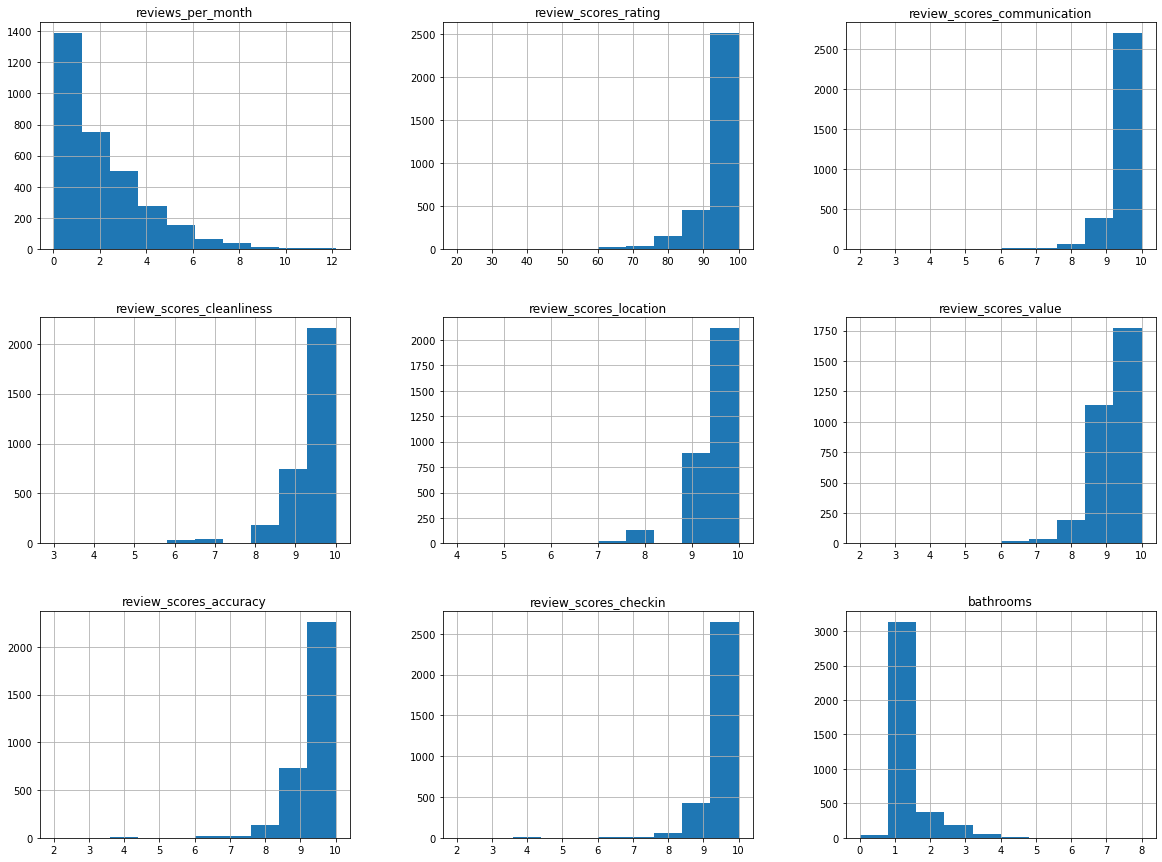

In [20]:
plt.figure(figsize=(8,8),facecolor='red',edgecolor='blue')
listings[['reviews_per_month','review_scores_rating','review_scores_communication','review_scores_cleanliness','review_scores_location','review_scores_value','review_scores_accuracy','review_scores_checkin','bathrooms']].hist(figsize=(20,15))

<b>Since every distribution is skewed either towards right or left we can conclude to impute these missing values with the median value.<br>
Also review scores are left skewed and hence interprets the reviews rating as satisfactory.<b>

In [21]:
#storing all numeric columns in num
num = numeric.columns

In [22]:
#filling missing values with median for numeric category
lis_imput = lambda x:x.fillna(x.median())
listings[num] = listings[num].apply(lis_imput)

In [23]:
#making a new column with number of amenities given from amenities column
am=[]

for i in listings['amenities']:
    #print(i,len(i.split(',')))
    am.append(len(i.split(',')))
listings['number_of_amenities']=am
   

In [24]:
#storing all object columns in obj
obj = objects.columns

In [25]:
#making a list of all object column variables with missing values
list1=[]
for i in total_list.index:
    if i in obj:
        list1.append(i)
list1

['monthly_price',
 'security_deposit',
 'weekly_price',
 'notes',
 'neighborhood_overview',
 'cleaning_fee',
 'transit',
 'host_about',
 'host_acceptance_rate',
 'last_review',
 'first_review',
 'space',
 'host_response_rate',
 'host_response_time',
 'neighbourhood',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_neighbourhood',
 'summary',
 'host_location',
 'zipcode',
 'host_name']

### Treating Price column datatype

In [26]:
#all the price related column variables are object in datatype
price = ['price','monthly_price',
 'security_deposit',
 'weekly_price','cleaning_fee']
price

['price', 'monthly_price', 'security_deposit', 'weekly_price', 'cleaning_fee']

In [27]:
# Changing all the columns in price list from object to float datatype
#initially fill nan values with $0
listings[price] = listings[price].fillna('$0')
listings[price]

,price,monthly_price,security_deposit,weekly_price,cleaning_fee
0,$85.00,$0,$0,$0,$0
1,$150.00,"$3,000.00",$100.00,"$1,000.00",$40.00
2,$975.00,$0,"$1,000.00",$0,$300.00
3,$100.00,"$2,300.00",$0,$650.00,$0
4,$450.00,$0,$700.00,$0,$125.00
...,...,...,...,...,...
3813,$359.00,$0,$0,$0,$230.00
3814,$79.00,$0,$500.00,$0,$50.00
3815,$93.00,$0,$250.00,$450.00,$35.00
3816,$99.00,$0,$300.00,$0,$45.00


In [28]:
#lets make it float
#remove $ sign
lis_dollar = lambda x:x.lstrip('$')
#replaced , from numbers e.g. 1,234 = 1234
lis_rep = lambda x:x.replace(',','')

listings['price']= listings['price'].apply(lis_dollar)
listings['monthly_price']= listings['monthly_price'].apply(lis_dollar)
listings['weekly_price']= listings['weekly_price'].apply(lis_dollar)
listings['security_deposit']= listings['security_deposit'].apply(lis_dollar)
listings['cleaning_fee']= listings['cleaning_fee'].apply(lis_dollar)

listings['price']= listings['price'].apply(lis_rep)
listings['monthly_price']= listings['monthly_price'].apply(lis_rep)
listings['weekly_price']= listings['weekly_price'].apply(lis_rep)
listings['security_deposit']= listings['security_deposit'].apply(lis_rep)
listings['cleaning_fee']= listings['cleaning_fee'].apply(lis_rep)

#converting the datatype to float

listings['price']= listings['price'].astype('float')
listings['monthly_price']= listings['monthly_price'].astype('float')
listings['weekly_price']= listings['weekly_price'].astype('float')
listings['security_deposit']= listings['security_deposit'].astype('float')
listings['cleaning_fee']= listings['cleaning_fee'].astype('float')

In [29]:
listings[price].describe()

,price,monthly_price,security_deposit,weekly_price,cleaning_fee
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,127.976166,1038.352803,140.566003,414.892614,45.062860
std,90.250022,1677.470398,237.387534,551.477118,49.913798
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,0.000000,0.000000,262.000000,30.000000
75%,150.000000,1890.000000,200.000000,671.500000,65.000000
max,1000.000000,19500.000000,5000.000000,6300.000000,300.000000


In [30]:
#Replacing 0s with median
lis_imput = lambda x:x.replace(0,x.median())
listings[price] = listings[price].apply(lis_imput)

In [31]:
#Replacing 0s with mean
lis_imput = lambda x:x.replace(0,x.mean())
listings[price] = listings[price].apply(lis_imput)

In [32]:
listings[price]

,price,monthly_price,security_deposit,weekly_price,cleaning_fee
0,85.0,1038.352803,140.566003,262.0,30.0
1,150.0,3000.000000,100.000000,1000.0,40.0
2,975.0,1038.352803,1000.000000,262.0,300.0
3,100.0,2300.000000,140.566003,650.0,30.0
4,450.0,1038.352803,700.000000,262.0,125.0
...,...,...,...,...,...
3813,359.0,1038.352803,140.566003,262.0,230.0
3814,79.0,1038.352803,500.000000,262.0,50.0
3815,93.0,1038.352803,250.000000,450.0,35.0
3816,99.0,1038.352803,300.000000,262.0,45.0


In [33]:
#Treating missing values of text by imputing unknown
listings[obj] = listings[obj].fillna('Unknown')

In [34]:
#checking for any null value in listings again!!
np.sum(listings.isnull().sum())

0

### Reviews

In [35]:
#checking null values
(reviews.isnull().sum()/reviews.shape[0])*100

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.021214
dtype: float64

In [36]:
#filling missing values with 'no comments'
reviews['comments'] = reviews['comments'].fillna('no_comment')

In [37]:
reviews['comments'].head()

0    Cute and cozy place. Perfect location to every...
1    Kelly has a great room in a very central locat...
2    Very spacious apartment, and in a great neighb...
3    Close to Seattle Center and all it has to offe...
4    Kelly was a great host and very accommodating ...
Name: comments, dtype: object

### Further Exploring the Data for Unique values check

In [38]:
listings[['scrape_id', 'last_scraped','city', 'state','smart_location', 'country_code', 'country','jurisdiction_names']].nunique()

scrape_id             1
last_scraped          1
city                  7
state                 2
smart_location        7
country_code          1
country               1
jurisdiction_names    1
dtype: int64

In [39]:
listings[['city','smart_location']].value_counts()

city                   smart_location           
Seattle                Seattle, WA                  3810
Seattle                Seattle , WA                    2
West Seattle           West Seattle, WA                2
Ballard, Seattle       Ballard, Seattle, WA            1
Phinney Ridge Seattle  Phinney Ridge Seattle, WA       1
seattle                seattle, wa                     1
西雅图                    西雅图, WA                         1
dtype: int64

In [40]:
#remove these columns from the dataframe as these have only 1 or 2 unique entries
remove = ['scrape_id', 'last_scraped','city', 'state','smart_location', 'country_code', 'country','jurisdiction_names','calendar_last_scraped','host_since','first_review','last_review','requires_license']
listings.drop(columns=remove,inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 79 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   name                              3818 non-null   object 
 3   summary                           3818 non-null   object 
 4   space                             3818 non-null   object 
 5   description                       3818 non-null   object 
 6   experiences_offered               3818 non-null   object 
 7   neighborhood_overview             3818 non-null   object 
 8   notes                             3818 non-null   object 
 9   transit                           3818 non-null   object 
 10  thumbnail_url                     3818 non-null   object 
 11  medium_url                        3818 non-null   object 
 12  pictur

# Visual Analysis

### Q1. What kind of properties are available in Seattle listings with a relatively high price and instant bookings.

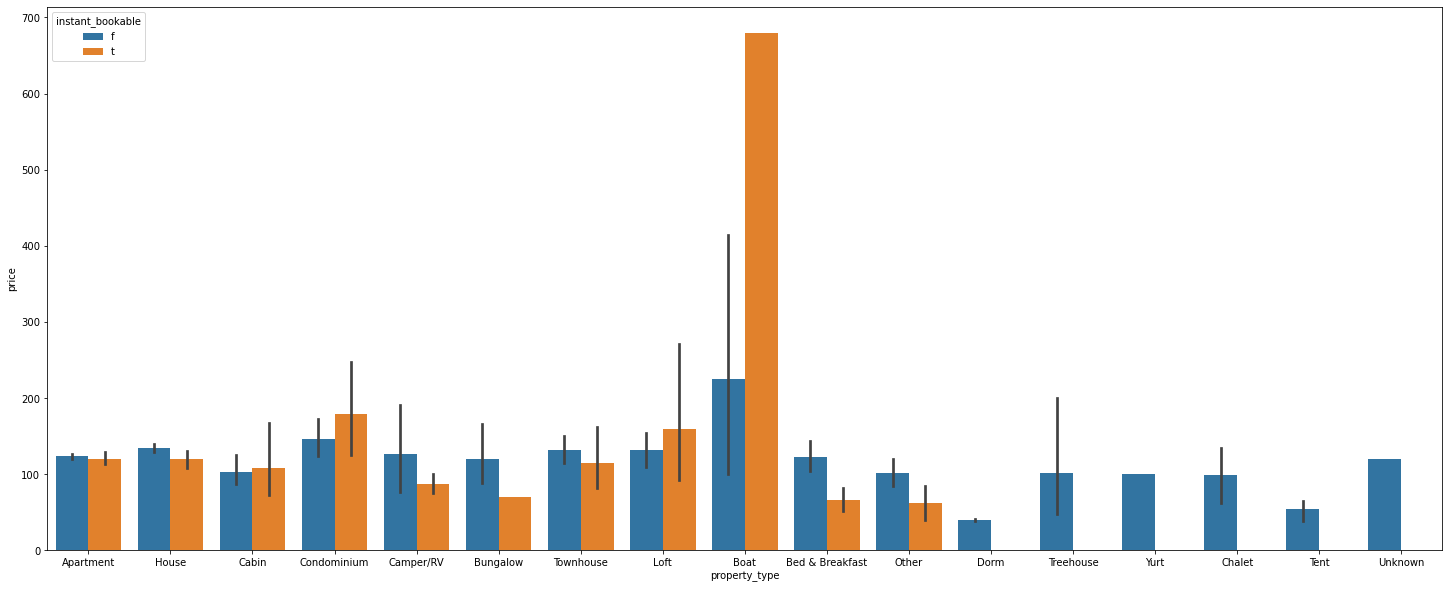

In [41]:
#Property type and price with instant bookings response
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=listings,x='property_type',y='price',hue='instant_bookable',ax=ax)
plt.show()

<b>Boat Property type, condominium, Loft are the top three property types with highest pricing range and that too with instant bookings available.<br>
whereas Dorm, Treehouse,Yurt,Chalet and tent does not have the facility of instantly bookings.<b>

### Q2. How does the host deals with cancellation policies from customers.

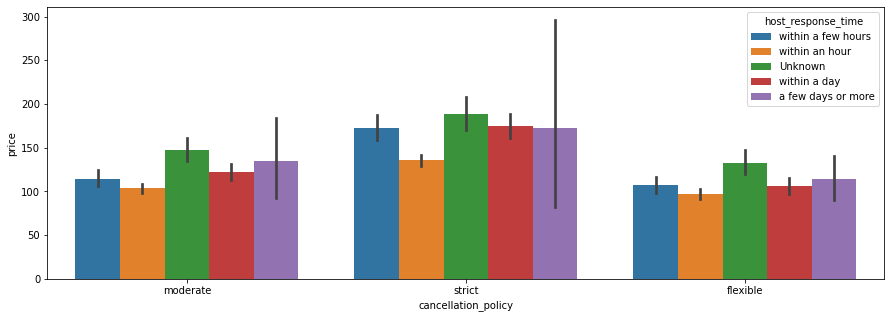

In [42]:
#price with cancellation policy and host_response time
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=listings,x='cancellation_policy',y='price',hue='host_response_time',ax=ax)
plt.show()

Where cancellation policy is strict price range seems the higher and it even takes a few days or more for the host to response to client.<br>
<b>Whereas with flexible and moderate cancellation policies, host response time takes maximum of a day to respond.

### Q3. Which cities in Seattle provide the highest listings.



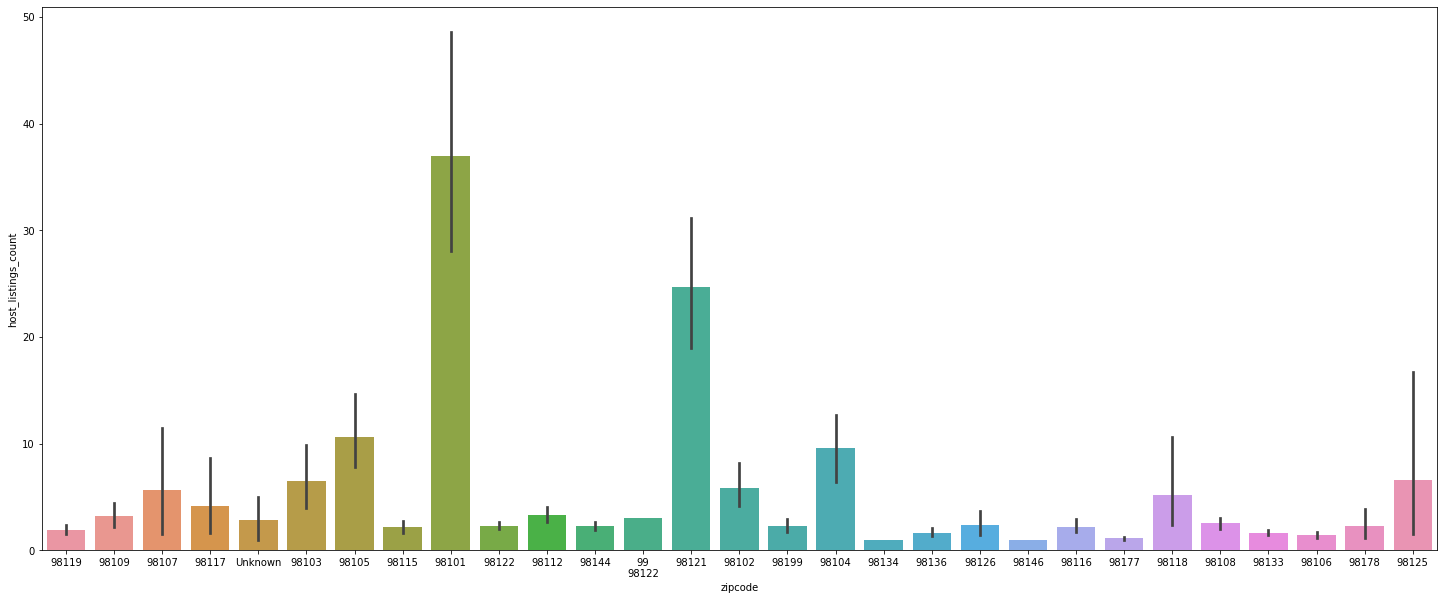

In [43]:
#zipcodes with host_listings_count
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=listings,x='zipcode',y='host_listings_count',ax=ax)
plt.show()


<b>Top 3 zipcodes with highest host listings count:<br>
1. 98101
2. 98121
3. 98105</b>

### Q4. How does people feel about their experience with the listings in Seattle.

### Sentiment analysis
TextBlob is another excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores.

Typically, the scores have a normalized scale as compare to Afinn. The polarity score is a float within the range [-1.0, 1.0].


In [44]:
#comments_score of comments from reviews
reviews['comments_score'] = reviews['comments'].apply(lambda comment: TextBlob(comment).sentiment.polarity)
print(reviews.head())

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  comments_score  
0  Cute and cozy place. Perfect location to every...        0.433333  
1  Kelly has a great room in a very central locat...        0.301136  
2  Very spacious apartment, and in a great neighb...        0.410417  
3  Close to Seattle Center and all it has to offe...        0.358333  
4  Kelly was a great host and very accommodating ...        0.493485  


In [45]:
#extracting date and year column
reviews['date'] = pd.to_datetime(reviews['date'],format='%Y/%m/%d')
reviews['year'] = reviews['date'].dt.year

In [46]:
#finding average of comments_score with respect to year
df_group = reviews.groupby(['year'])['comments_score'].mean()

df_group

year
2009    0.380031
2010    0.391480
2011    0.400281
2012    0.388009
2013    0.387479
2014    0.386493
2015    0.394373
2016    0.411008
Name: comments_score, dtype: float64

<b>Looks like the average sentiment is positive in every case around.<br>That means people are having a gala time in Seattle!!!!!

### Handling Categorical Data

In [47]:
#Let's try out adding dummy variables for the categorical variables into the model. 
#list of columns which can undergo get dummies treatment
lis =['cancellation_policy','room_type','host_response_time','property_type']
#'zipcode'

In [48]:
#treating categorical variables by using get_dummies.
listings_1 = pd.concat([listings.drop(lis, axis=1), pd.get_dummies(listings[lis], prefix=lis, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [49]:
#keeping numeric column variables
final_df = listings_1.select_dtypes(exclude='object')

### 4.Data Modelling

In [50]:
final_df.columns

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'number_of_amenities',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'room_type_Private room', 'room_type_Shared room',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       

In [51]:
#instantiating y for ML process
Y = final_df['price']

In [52]:
#columns need to get dropped as these are redundant.
drop_list= ['id','host_id','price','host_listings_count','availability_30',
       'availability_60', 'availability_90','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included']

In [53]:
final_df.drop(columns=drop_list,inplace=True)

/Users/Shared/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
final_df.columns

Index(['host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'number_of_amenities',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'room_type_Private room', 'room_type_Shared room',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
  

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_total_listings_count              3818 non-null   float64
 1   latitude                               3818 non-null   float64
 2   longitude                              3818 non-null   float64
 3   accommodates                           3818 non-null   int64  
 4   weekly_price                           3818 non-null   float64
 5   monthly_price                          3818 non-null   float64
 6   security_deposit                       3818 non-null   float64
 7   cleaning_fee                           3818 non-null   float64
 8   minimum_nights                         3818 non-null   int64  
 9   maximum_nights                         3818 non-null   int64  
 10  availability_365                       3818 non-null   int64  
 11  revi

### Q5. Price Prediction

### Predicting price

Training and Testing a Machine Learning Model

In [56]:
#instantiating X
X=final_df

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state=2022)

 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200,max_depth=7,random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train,y_train) 

y_test_predict = regressor.predict(X_test)
y_train_predict = regressor.predict(X_train)
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print('test_score: ',test_score)
print('train_score: ', train_score)
if abs(test_score/train_score) > 0.8:
    print('The model is not overfitted.')
else:
    print('Need to improve the model.')
print('The r-squared score for the model is {} on {} values.'.format(test_score, len(y_test)),'\n')



test_score:  0.65813994913086
train_score:  0.8114644444237007
The model is not overfitted.
The r-squared score for the model is 0.65813994913086 on 1146 values. 



### 5.Evaluation

In [57]:
#Evaluating the feature importance of all the column variables used
regressor.feature_importances_

array([4.69700790e-03, 2.29611509e-02, 3.06219643e-02, 3.88480943e-01,
       2.67703306e-01, 5.69769143e-03, 3.48276484e-02, 8.29692078e-02,
       7.37942332e-03, 6.07966981e-03, 1.83936862e-02, 2.02853217e-03,
       2.00814606e-03, 3.42545475e-02, 1.42441462e-02, 7.91597808e-04,
       1.35493309e-03, 3.43793859e-02, 1.76753745e-02, 1.23998342e-04,
       5.49048141e-04, 2.31259585e-03, 1.21634358e-03, 7.94047538e-04,
       1.16162043e-02, 0.00000000e+00, 0.00000000e+00, 8.46463548e-04,
       0.00000000e+00, 3.07279201e-03, 5.24243116e-04, 1.61728936e-03,
       6.92378187e-04, 1.30788935e-05, 0.00000000e+00, 7.31548005e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

Rank features by their impact on the price: 
                                   feature      coef  abs_coef
3                            accommodates  0.388481  0.388481
4                            weekly_price  0.267703  0.267703
7                            cleaning_fee  0.082969  0.082969
6                        security_deposit  0.034828  0.034828
17                 room_type_Private room  0.034379  0.034379
13                      reviews_per_month  0.034255  0.034255
2                               longitude  0.030622  0.030622
1                                latitude  0.022961  0.022961
10                       availability_365  0.018394  0.018394
18                  room_type_Shared room  0.017675  0.017675
14                    number_of_amenities  0.014244  0.014244
24                     property_type_Boat  0.011616  0.011616
8                          minimum_nights  0.007379  0.007379
9                          maximum_nights  0.006080  0.006080
5                       

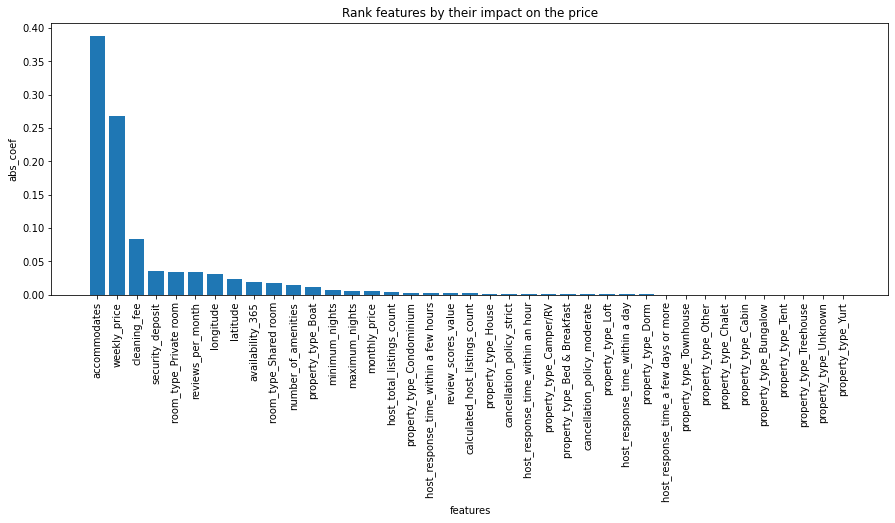

In [58]:
coef_df = pd.DataFrame()
coef_df['feature'] = X_train.columns
coef_df['coef'] = regressor.feature_importances_
coef_df['abs_coef'] = np.abs(regressor.feature_importances_)
coef_df = coef_df.sort_values(by=['abs_coef'], ascending=False)
print('Rank features by their impact on the price: \n', coef_df, '\n')

plt.figure(figsize = (15,5))
plt.bar(coef_df['feature'], coef_df['abs_coef'])
plt.xlabel('features')
plt.xticks(coef_df['feature'], rotation = 90)
plt.ylabel('abs_coef')
plt.title('Rank features by their impact on the price')
plt.show()

<b>These column variables seems to affect the most in deciding the price prediction.<br></b>
accommodates<br>
weekly_price<br>
cleaning_fee<br>
security_deposit<br>
room_type_Private room<br>
reviews_per_month<br>
longitude<br>
latitude<br>
availability_365<br>
room_type_Shared room<br>
number_of_amenities<br>